# Check Figure Notebook

## Check add_feature method

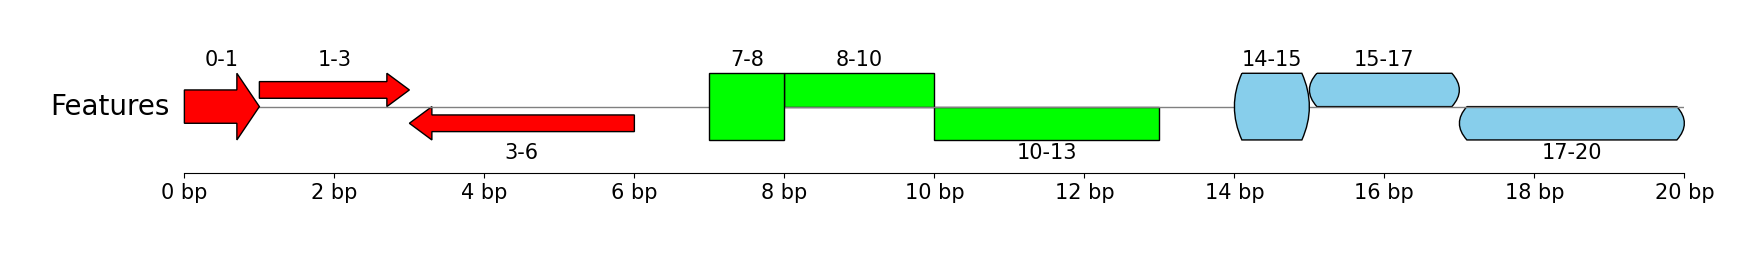

In [1]:
from pygenomeviz import GenomeViz

gv = GenomeViz(fig_track_height=0.5, tick_track_ratio=0.5, tick_style="axis")

track = gv.add_feature_track("Features", 20)

feature_kws = dict(linewidth=1, labelrotation=0, labelha="center")

# Check arrow feature
track.add_feature(0, 1, +1, plotstyle="bigarrow", facecolor="red", label="0-1", **feature_kws)
track.add_feature(1, 3, +1, plotstyle="arrow", facecolor="red", label="1-3", **feature_kws)
track.add_feature(3, 6, -1, plotstyle="arrow", facecolor="red", label="3-6", **feature_kws)

# Check box feature
track.add_feature(7, 8, +1, plotstyle="bigbox", facecolor="lime", label="7-8", **feature_kws)
track.add_feature(8, 10, +1, plotstyle="box", facecolor="lime", label="8-10", **feature_kws)
track.add_feature(10, 13, -1, plotstyle="box", facecolor="lime", label="10-13", **feature_kws)

# Check rbox feature
track.add_feature(14, 15, +1, plotstyle="bigrbox", facecolor="skyblue", label="14-15", **feature_kws)
track.add_feature(15, 17, +1, plotstyle="rbox", facecolor="skyblue", label="15-17", **feature_kws)
track.add_feature(17, 20, -1, plotstyle="rbox", facecolor="skyblue", label="17-20", **feature_kws)

fig = gv.plotfig()

## Check add_exon_feature method

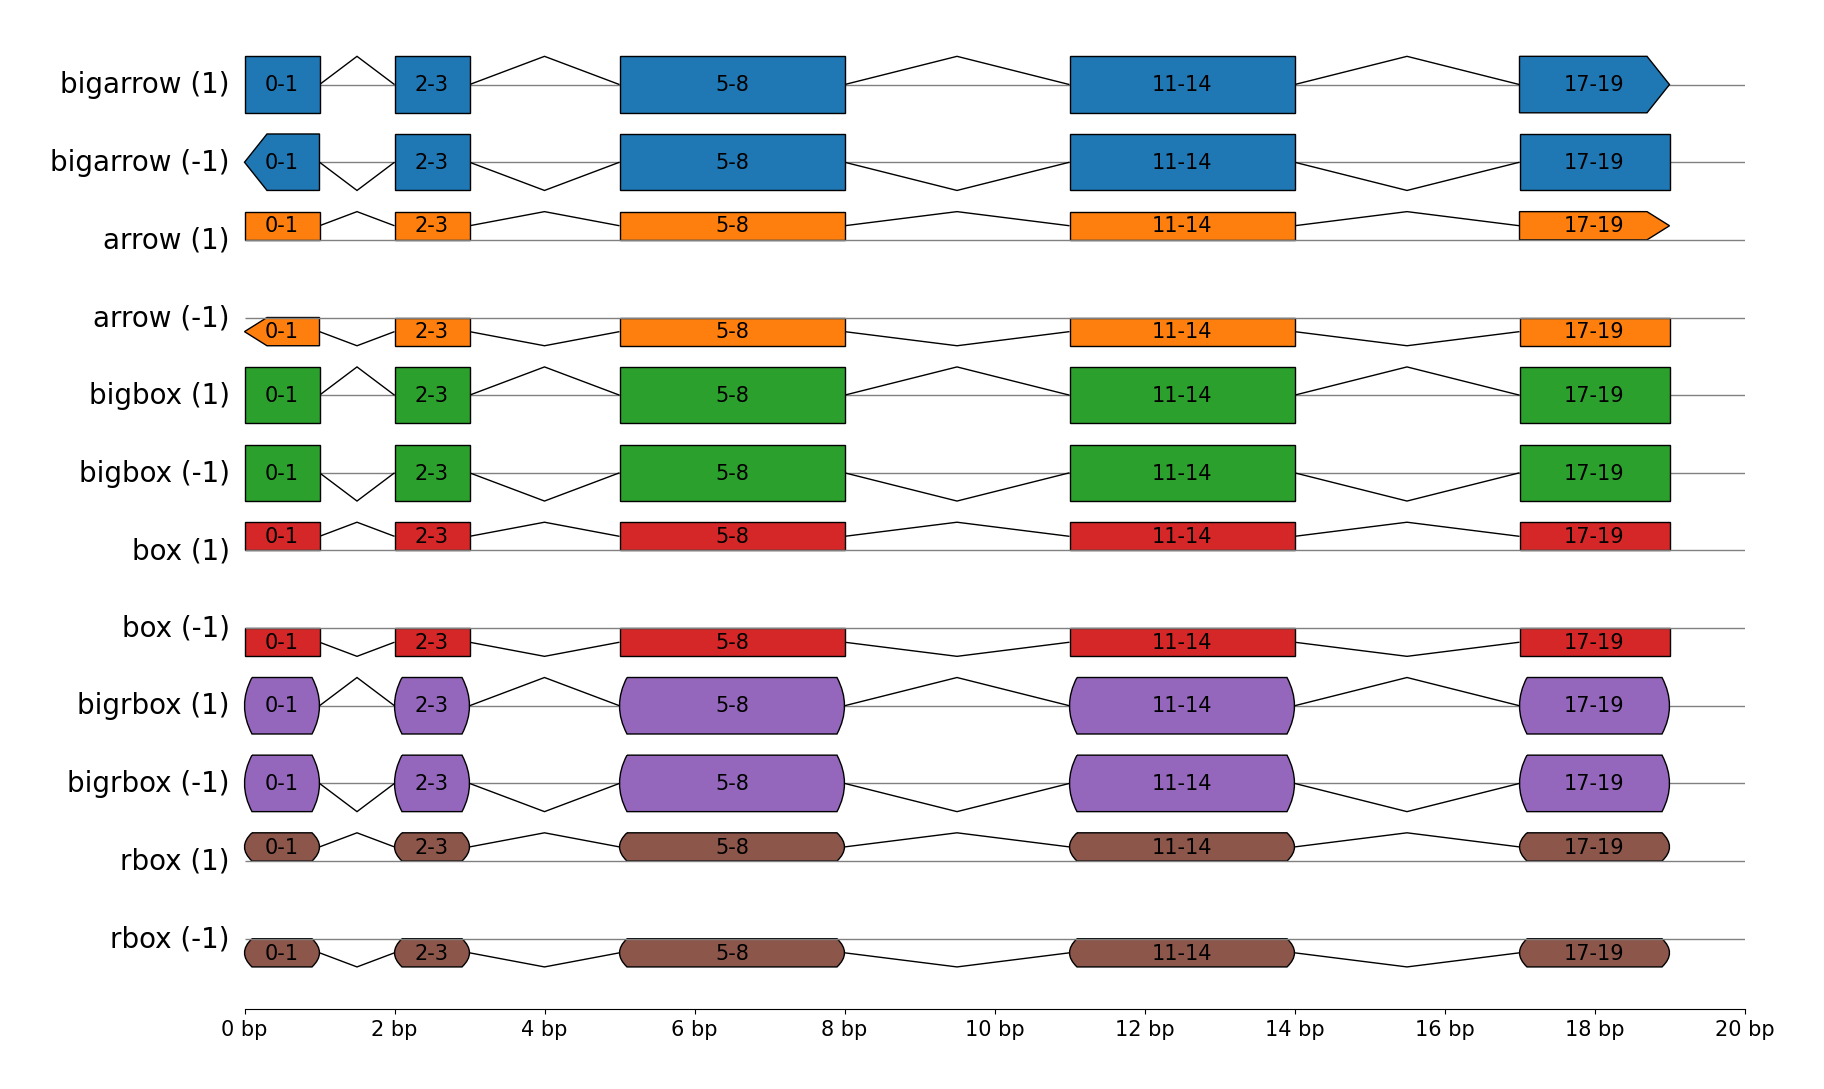

In [2]:
from pygenomeviz import GenomeViz
from pygenomeviz.utils import ColorCycler

gv = GenomeViz(fig_track_height=0.4, link_track_ratio=0.1, tick_track_ratio=0.5, tick_style="axis")

exon_regions = [(0,1), (2,3), (5,8), (11, 14), (17, 19)]
plotstyles = ("bigarrow", "arrow", "bigbox", "box", "bigrbox", "rbox")
exon_labels = [f"{start}-{end}" for (start, end) in exon_regions]
feature_kws = dict(linewidth=1, labelrotation=0, arrow_shaft_ratio=1.0, size_ratio=0.8, labelha="center", labelvpos="center", exon_labels=exon_labels)

ColorCycler.reset_cycle()
for plotstyle in plotstyles:
    color = ColorCycler()
    for strand in (+1, -1):
        name = f"{plotstyle} ({strand})"
        track = gv.add_feature_track(name, 20)
        track.add_exon_feature(exon_regions, strand, plotstyle=plotstyle, facecolor=color, **feature_kws)

fig = gv.plotfig()

## Check add_link method

### Case1. FeatureTrack start_pos == 0

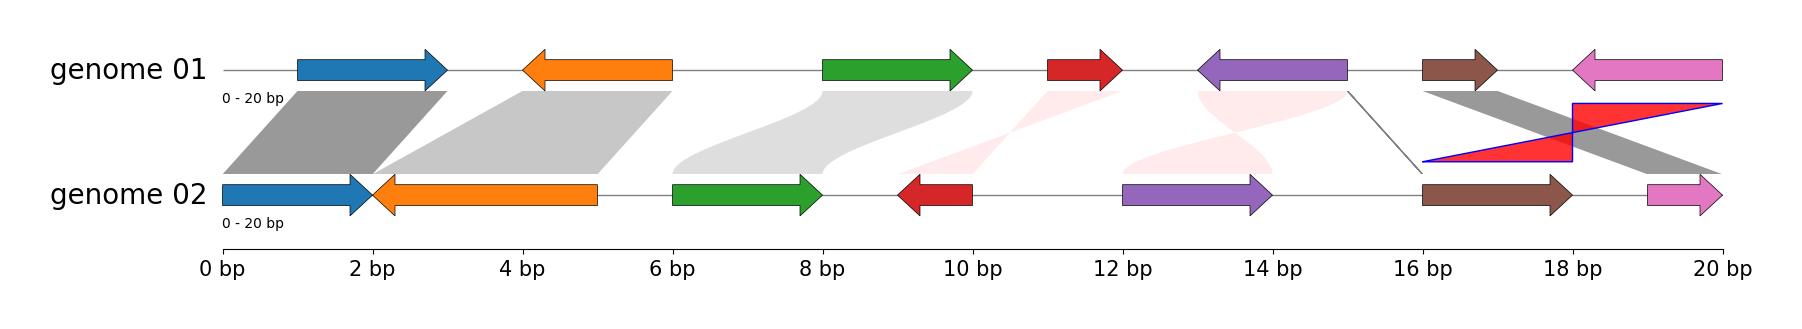

In [3]:
from pygenomeviz import GenomeViz
from pygenomeviz.utils import ColorCycler

gv = GenomeViz(fig_track_height=0.5, link_track_ratio=2, tick_track_ratio=0.8, tick_style="axis")

genome_list = [
    {"name": "genome 01", "size": 20, "cds_list": [(1, 3, 1), (4, 6, -1), (8, 10, 1), (11, 12, 1), (13, 15, -1), (16, 17, 1), (18, 20, -1)]},
    {"name": "genome 02", "size": 20, "cds_list": [(0, 2, 1), (2, 5, -1), (6, 8, 1), (9, 10, -1), (12, 14, 1), (16, 18, 1), (19, 20, 1)]},
]

for genome in genome_list:
    name, size, cds_list = genome["name"], genome["size"], genome["cds_list"]
    track = gv.add_feature_track(name, size)
    ColorCycler.reset_cycle()
    for cds in cds_list:
        start, end, strand = cds
        track.add_feature(start, end, strand, linewidth=0.5, facecolor=ColorCycler())
        track.set_sublabel(size=10)

# Link between "genome 01" to "genome 02"
gv.add_link(("genome 01", 1, 3), ("genome 02", 0, 2)) 
gv.add_link(("genome 01", 4, 6), ("genome 02", 2, 5), v=50) 
gv.add_link(("genome 02", 6, 8), ("genome 01", 8, 10), curve=True, v=25) 
gv.add_link(("genome 01", 11, 12), ("genome 02", 10, 9), v=0)  
gv.add_link(("genome 01", 15, 13), ("genome 02", 12, 14), curve=True, v=50, vmin=50)
gv.add_link(("genome 01", 15, 15), ("genome 02", 16, 16))
gv.add_link(("genome 01", 16, 17), ("genome 02", 19, 20))
gv.add_link(("genome 01", 20, 18), ("genome 02", 16, 18), size_ratio=0.7, patch_kws=dict(ec="blue", lw=1))

fig = gv.plotfig()

### Case2. FeatureTrack start_pos != 0

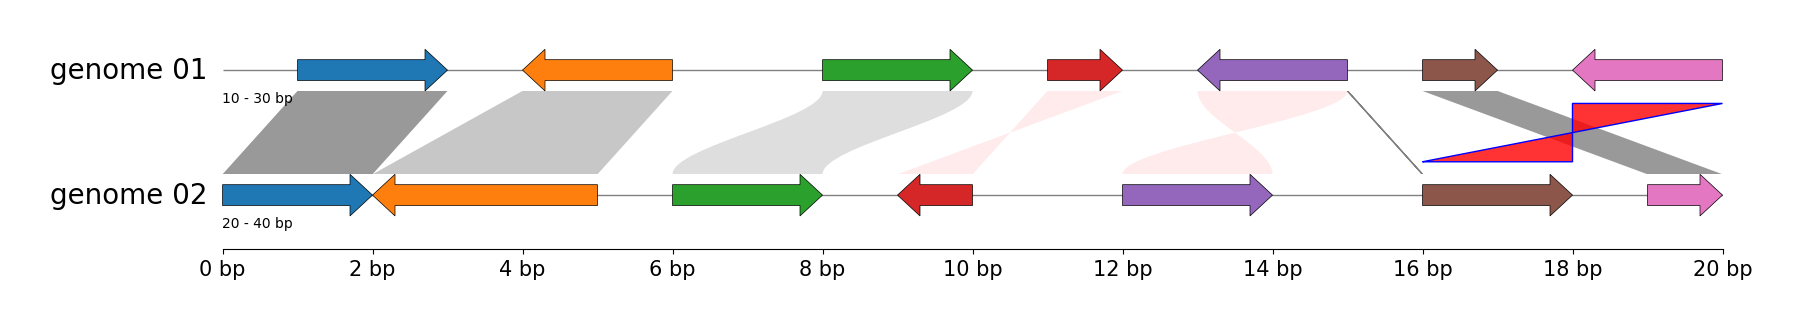

In [4]:
from pygenomeviz import GenomeViz
from pygenomeviz.utils import ColorCycler
import numpy as np

gv = GenomeViz(fig_track_height=0.5, link_track_ratio=2, tick_track_ratio=0.8, tick_style="axis")

genome_list = [
    {"name": "genome 01", "size": 20, "start_pos": 10, "cds_list": [(11, 13, 1), (14, 16, -1), (18, 20, 1), (21, 22, 1), (23, 25, -1), (26, 27, 1), (28, 30, -1)]},
    {"name": "genome 02", "size": 20, "start_pos": 20, "cds_list": [(20, 22, 1), (22, 25, -1), (26, 28, 1), (29, 30, -1), (32, 34, 1), (36, 38, 1), (39, 40, 1)]},
]

for genome in genome_list:
    name, size, start_pos, cds_list = genome["name"], genome["size"], genome["start_pos"], genome["cds_list"]
    track = gv.add_feature_track(name, size, start_pos=start_pos)
    ColorCycler.reset_cycle()
    for cds in cds_list:
        start, end, strand = cds
        track.add_feature(start, end, strand, linewidth=0.5, facecolor=ColorCycler())
        track.set_sublabel(size=10)

# Link between "genome 01" to "genome 02"
gv.add_link(("genome 01", 11, 13), ("genome 02", 20, 22)) 
gv.add_link(("genome 01", 14, 16), ("genome 02", 22, 25), v=50) 
gv.add_link(("genome 02", 26, 28), ("genome 01", 18, 20), curve=True, v=25) 
gv.add_link(("genome 01", 21, 22), ("genome 02", 30, 29), v=0)  
gv.add_link(("genome 01", 25, 23), ("genome 02", 32, 34), curve=True, v=50, vmin=50)
gv.add_link(("genome 01", 25, 25), ("genome 02", 36, 36))
gv.add_link(("genome 01", 26, 27), ("genome 02", 39, 40))
gv.add_link(("genome 01", 30, 28), ("genome 02", 36, 38), size_ratio=0.7, patch_kws=dict(ec="blue", lw=1))

fig = gv.plotfig()